<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Parcial2/InversionDescenso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

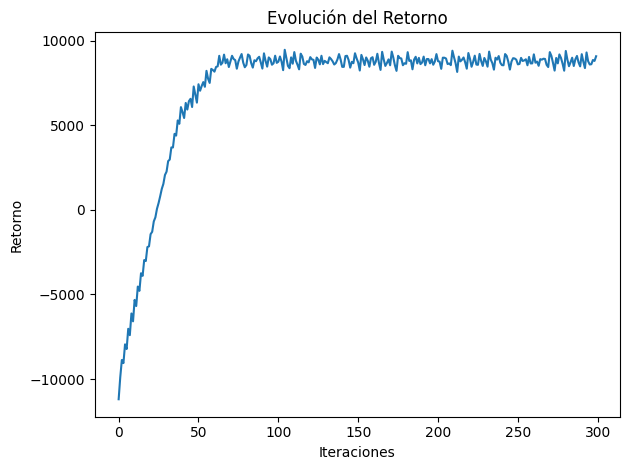

Pesos finales: [0.17882512 0.21069167 0.29758178 0.31290142]
Retorno final: 9083.325468645231


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros
cuotas = np.array([6.1, 5.2, 3.7, 3.5])  # Cuotas de inversión
capital = 100000  # Capital total

def retorno(w):
    return np.min(w * cuotas - 1) * capital  # Tomamos el mínimo en lugar del máximo

def gradiente(w):
    """ Calcula el gradiente considerando solo el mínimo. """
    i_min = np.argmin(w * cuotas)  # Encuentra el índice del mínimo
    grad = np.zeros_like(w)  # Inicializa el gradiente en ceros
    grad[i_min] = cuotas[i_min] * capital  # Solo el mínimo contribuye
    return grad / np.linalg.norm(grad)

# Inicializamos los pesos de forma uniforme
w = np.array([1/4, 1/4, 1/4, 1/4])
tasa_aprendizaje = 0.005  # Paso del gradiente
iteraciones = 300  # Número de iteraciones

# Almacenamos los valores para análisis
historial_retornos = []

epsilon = 1e-5  # Pequeño valor para evitar que los pesos sean exactamente cero

# Algoritmo de descenso de gradiente con normalización por la suma y asegurando no negatividad
for _ in range(iteraciones):
    grad = gradiente(w)  # Calculamos el gradiente
    #print(grad)
    w = w + tasa_aprendizaje * grad  # Paso de gradiente normalizado
    w = np.maximum(w, epsilon)  # Asegurar que los pesos sean mayores a cero
    w = w / np.sum(w)  # Normalización para que los pesos sumen 1
    historial_retornos.append(retorno(w))  # Guardamos el retorno para análisis

# Mostrar resultados finales
w_final = w
retorno_final = retorno(w_final)

# Graficar la evolución del retorno
plt.plot(historial_retornos)
plt.xlabel('Iteraciones')
plt.ylabel('Retorno')
plt.title('Evolución del Retorno')
plt.tight_layout()
plt.savefig('RetornoGradiente.pdf')
plt.show()

# Imprimir los resultados finales
print("Pesos finales:", w_final)
print("Retorno final:", retorno_final)
